# Assignment 7


You will demonstrate your ability to create and train Neural Network models.

You will *only* use `Dense` layers.

# Objectives

This is a "doing" rather than "thinking" assignment.

Your goal is to checkpoint your skills to see if they are sufficient to create, train, and evaluate
Neural Network models.

# Submission guidelines

There are some specified tasks you must carry out, which involve playing around with a number of models.

We want to be able to evaluate *your best model* on a holdout dataset.

To faciliate this,
in addition to providing your notebook, we will ask you to create the subroutine `MyModel`
described below **and submit one additional file** to be described.

You will choose your *best model* and using the code provided in the cell below, save the model to a file and **submit the file with your saved model** along with the notebook.

The code cell below **should be the last cell in your notebook**.

The last cell:
- defines a routine to save a "model" object to a file
- defines a routine to load a model object from a file
- asks you to save the model for one of the tasks
- asks you to run `MyModel`

`MyModel` takes as arguments
- a test set: `x_test`, `y_test`
- name of a file containing a model object for a specified task

`MyModel` will load the file (i.e., restore the model) and run predictions on the test set.

You will need to complete the body of the `MyModel` definition.

We will run `MyModel` in that cell in order to load your saved model and run it
- We will not run any other cell in the notebook so if you need imports or anything else. put it there!  
- We **will not** run cells that train your model: that would take too long)
- If you need the holdout data to be transformed
    - the transformations should be called from `MyModel`
    - we will not run a cell to make the transformation happen

# HINT
**This is literally a give-away:** https://www.tensorflow.org/tutorials/keras/classification

**Load Data**

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Task1- One layer model**

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_task1 = Sequential([
    Dense(10, activation='softmax', input_shape=(784,))
])

model_task1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_task1.fit(x_train, y_train, epochs=5, validation_split=0.1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7355 - loss: 0.7822 - val_accuracy: 0.8292 - val_loss: 0.4851
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8381 - loss: 0.4721 - val_accuracy: 0.8452 - val_loss: 0.4469
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8490 - loss: 0.4454 - val_accuracy: 0.8497 - val_loss: 0.4337
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8539 - loss: 0.4265 - val_accuracy: 0.8517 - val_loss: 0.4293
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8551 - loss: 0.4206 - val_accuracy: 0.8522 - val_loss: 0.4214


**Task2-  Experiment with Layers & Units**

In [3]:
def build_model(num_layers, units):
    model = Sequential()
    model.add(Dense(units, activation='relu', input_shape=(784,)))
    for _ in range(num_layers - 1):
        model.add(Dense(units, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [4]:
results = {}
for layers in [2, 3, 4]:
    for units in [10, 50, 200]:
        model = build_model(layers, units)
        model.fit(x_train, y_train, epochs=5, batch_size=128, verbose=0, validation_split=0.1)
        _, acc = model.evaluate(x_test, y_test, verbose=0)
        results[(layers, units)] = acc


**Step4: Plot results**

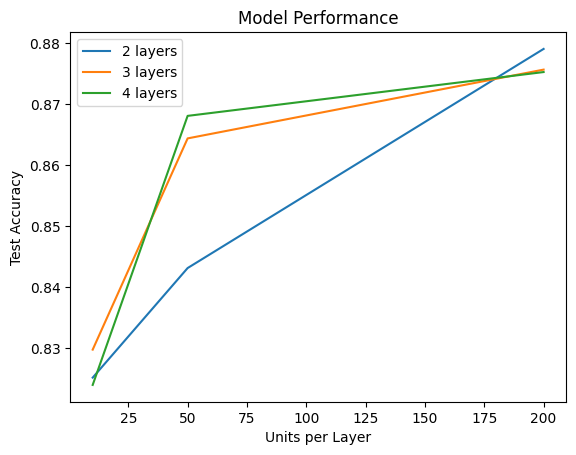

In [5]:
import matplotlib.pyplot as plt

for layers in [2, 3, 4]:
    accs = [results[(layers, u)] for u in [10, 50, 200]]
    plt.plot([10, 50, 200], accs, label=f'{layers} layers')

plt.xlabel('Units per Layer')
plt.ylabel('Test Accuracy')
plt.title('Model Performance')
plt.legend()
plt.show()


**Step5: Choose Best Model **

In [6]:
my_model = build_model(3, 200)
my_model.fit(x_train, y_train, epochs=5, validation_split=0.1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7802 - loss: 0.6118 - val_accuracy: 0.8500 - val_loss: 0.4280
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.8610 - loss: 0.3794 - val_accuracy: 0.8678 - val_loss: 0.3567
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8747 - loss: 0.3412 - val_accuracy: 0.8773 - val_loss: 0.3409
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8825 - loss: 0.3120 - val_accuracy: 0.8768 - val_loss: 0.3580
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8893 - loss: 0.2946 - val_accuracy: 0.8825 - val_loss: 0.3243


## Additional submission

In addition to your notebook, please also submit the file whose name is stored in `model_path`.

**DO NOT** rename the file!


Here is the cell **that must appear as the last cell in your notebook**

In [9]:
import os
from tensorflow.keras.models import load_model
import tensorflow as tf


modelName = "assignment7_best_model"
model_path = os.path.join(".", modelName)

def saveModel(model, model_path):
    try:
        os.makedirs(model_path)
    except OSError:
        print("Directory {dir:s} already exists, files will be over-written.".format(dir=model_path))

    # Save JSON config to disk
    json_config = model.to_json()
    with open(os.path.join(model_path, 'config.json'), 'w') as json_file:
        json_file.write(json_config)
    # Save weights to disk
    model.save_weights(os.path.join(model_path, 'model.weights.h5'))

    print("Model saved in directory {dir:s}; create an archive of this directory and submit with your assignment.".format(dir=model_path))

def loadModel(model_path):
    # Reload the model from the 2 files we saved
    with open(os.path.join(model_path, 'config.json')) as json_file:
        json_config = json_file.read()
    model = tf.keras.models.model_from_json(json_config)
    model.load_weights(os.path.join(model_path, 'model.weights.h5'))

    return model

def MyModel(x_test, y_test, model_path):
    # YOU MAY NOT change model after this statement !

    # It should run model to create an array of predictions; we initialize it to the empty array for convenience
    model = loadModel(model_path)
    x_test = x_test / 255.0
    x_test = x_test.reshape(-1, 28 * 28)
    predictions = model.predict(x_test)


    return predictions

# Assign to variable my_model the model that solves task 3.2
my_model = build_model(3, 200)# CHANGE None to your model !
my_model.fit(x_train, y_train, epochs=5, validation_split=0.1)

saveModel(my_model, model_path)
predicts = MyModel(x_test, y_test, model_path)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7750 - loss: 0.6197 - val_accuracy: 0.8545 - val_loss: 0.3949
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8605 - loss: 0.3736 - val_accuracy: 0.8607 - val_loss: 0.3888
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8774 - loss: 0.3325 - val_accuracy: 0.8615 - val_loss: 0.3861
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8856 - loss: 0.3068 - val_accuracy: 0.8752 - val_loss: 0.3484
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8906 - loss: 0.2918 - val_accuracy: 0.8783 - val_loss: 0.3327
Directory ./assignment7_best_model already exists, files will be over-written.
Model saved in directory ./assignment7_best_model; create an archive of this directory and submit with your assignment.
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


# The problem

You will create several Neural Networks to solve a classification problem that is a slight variant
of the MNIST digit classification problem.

The assignment really involves little more than playing around with that example.

The objective is to ensure that you are able to write and run simple programs using Keras.

# The Data

The dataset is called Fashion MNIST.

Rather than classifying images into one of ten digits,
you will classify images of clothing items into one of ten classes.

Here's the code to get the data.

In [10]:
from tensorflow.kferas.datasets import mnist, fashion_mnist, cifar10

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


# Tasks

For each task
- create the Neural Network as specified
- train it on the training data set
- evaluate it on the test data set


## Task 1

Create a one layer Neural Network to perform classification (e.g., logistic regression) as we demonstrated in class.

No layers other than the one for classification.

# Task 2 (9 parts)

You will evaluate out of sample accuracy for several models and create a plot
- For number of layers in 2, 3,4 (more if you like)
- For number of units per layer in 10, 50, 200 (more if you like)
    - Using *same* number of units for each layer

The combination of choices for number of layers and number of units per layer gives you (at least) 9 models.

- Evaluate the out of sample accuracy for each of the 9 models.
- Present the results in a table (created by code)
- Create a *single plot*
    - Horizontal axis: number of units per layer
    - Vertical axis: out of sample accuracy
    - 3 traces in the plot, one for each choice of number of layers
        - e.g., one line in the plot for L=2, another line in the plot for L=3, and another line for L=4


# Extra credit
- Do a more extensive experiment
    - More layers
    - More choices for number of units per layer
    - Vary number of units per layer
        - Increase number of units with increasing layer number
        - Decrease number of units with increasing layer number
        - Find some other pattern for varying the number of units per layer
- Comment on when your models are either overfitting or underfitting
    - Use numeric justification
    